# **Lecture** Execution Control with `For` and `While` Loops

## Loops are a fundamental construct of execution control. Loops are a way of controlling repetition of code, i.e., allow the same piece of code to run multiple times. 

## Two repetion structures in Python are `for` loops and `while` loops. 

## `for` loops run a set number of times.  In a typical application, a block of code needs to be applied to the elements of a list or an array or list one at a time.    The number of repetitions of the code is determined in advance. 

## `while` loops run as long as a specific logical condition is true. The key difference between `while` and `for` loops is that *the number of repetitions in a while loop is unknown* 


In [1]:
import numpy as np 
from numpy import random
from matplotlib import pyplot as plt
#Lets start the random number generator
rng = random.default_rng(seed = 9876)


## 'For' Loop 

### A `for` loop is a repetition structure where a code block runs a specified number of times.

    for var in the_range_of_var:
        do this
        and this 
        and this 
    
### the_range_of_var can be given in many forms.  The most common way is the `range` command, but it can also be a **list** or a numpy **array** or even a **string**.

### The most important difference between a for loop and while loop is that a for loop **automatically increments the value of var to the next element in therange** in each repetition of the code block

### As we will see in the examples below var is often used an index variable that indexes into arrays sequentially. 

### Range Function

#### creates an integer list spanning a *range*.  Very useful for indexing and `for` loops. 

In [2]:
for i in range(3):
    print(i)

0
1
2



### Python's `range` function can be customized by supplying up to three arguments. The general format of the range function is below:

    range(start,stop,step)
    
### *start*, *stop*, *step* must be **integers**


In [3]:
for i in range(0,6,2):
    print(i)

0
2
4


In [4]:
print(range(0,6,2))
### That was kind of dissatisfying.  Range is apparently an object

range(0, 6, 2)


In [5]:
x = list(range(0,6,2))
print(x)
y = np.array(range(0,6,2))
print(y)
### That's better.  We can turn into a list.  Or, a numpy array. 
### This can be useful when you are figuring out how to use range
### Usually, we just call range and dont examine its contents. 

[0, 2, 4]
[0 2 4]


In [6]:
### Can I use numpy's arange instead of range to index a loop?  Yes! 
print('use arange')
for i in np.arange(0,6,2):
    print(i)
## Keep this in mind if you need to step in fractions.But usually we will work with range.
print('step in fractions')
for i in np.arange(0,2,0.25):
    print(i)

use arange
0
2
4
step in fractions
0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75


### For loops can index over lists or arrays 

In [7]:
mylist = [4,7,3,5]
print('index by list')
for i in mylist:
    print(i)
# the other way to do it is to use range over the length of the list (4):
print('index into list')
for i in range(4): 
    print(mylist[i])

index by list
4
7
3
5
index into list
4
7
3
5


## Organizing input and output arrays with a for loop. 

### In this section we will discuss how indexing in a loop can be used ot interact with the looping variable of an for loop in very useful ways.

### These examples are *NOT* the best use cases of for loops, but are cases where its easy to understand what the loop is doing.  

### Example: Projecting your bank account in 10years 

### Suppose you have $500 in your bank account and interest rate is 6.0\% compounded annually. Write a for loop that will compute how much you will have in 5 years. 

### **Yes, you can do this with a compound interest formula** Bear with me.  

In [8]:
nyears = 10
# number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
for year in range(nyears):
    balance = balance+interest*balance
print('Balance of ', balance, 'after ', nyears, 'years')
    

Balance of  895.4238482714267 after  10 years


### Suppose I wanted to save the output for each year, to make a graph. 
### Since I know the loop has 5 iterations corresponding to the 5 years


In [9]:
nyears = 10# number of years
balance = list() #notice I do n+1 here.  This is because year 0 is the first value and then 
                        # I want to interate n more years. 
interest = 0.06 # interest rate 
balance.append(500) # starting balance at year 0
for year in range(nyears):  #
    newbalance = balance[year]+interest*balance[year]
    balance.append(newbalance)
print('balance = ', balance)

balance =  [500, 530.0, 561.8, 595.5079999999999, 631.2384799999999, 669.1127887999999, 709.2595561279999, 751.8151294956799, 796.9240372654207, 844.739479501346, 895.4238482714267]


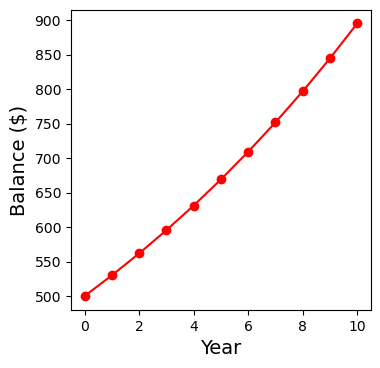

In [10]:
### Let's make a nice plot of it.  
fig = plt.figure(figsize = (3,3))
a = fig.add_axes([0,0,1,1])
a.plot(np.arange(0,nyears+1,1),balance,'ro-') # notice I control the x axis variable here using np.arange to go from 0 to 5
a.set_xlabel('Year',fontsize = 14)
a.set_ylabel('Balance ($)',fontsize=14)
plt.show()

### What if interest rate varies over the next 10 years? So that the interest rate for each of the five years is is [6\%, 8\%,4\%,4\%,8\% 6\%, 7\%,5\%,5\%,7\%]

In [12]:

interest = np.array([0.06,0.08,0.04,0.04,0.08,0.06,0.07,0.05,0.05,0.07]) # interest rate 
nyears = np.size(interest) # I determined the number of years from the lenght of interest using the size function
balance = list()
balance.append(500) # starting balance
for year in range(nyears):
    newbalance =  balance[year]+interest[year]*balance[year] #notice that I use year here as an index into interest
                                                                   #and into balance 
    balance.append(newbalance)
    

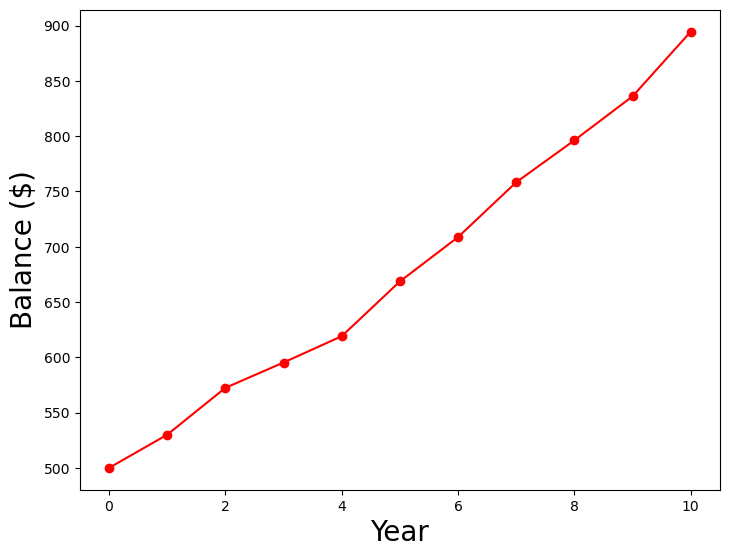

In [13]:
### Let's make a graph again 
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.plot(np.arange(0,nyears+1,1),balance,'ro-') # notice I control the x axis variable here using np.arange to go from 0 to 11
a.set_xlabel('Year',fontsize = 20)
a.set_ylabel('Balance ($)',fontsize=20)
plt.show()

## `While` Loops

### A `while` loop is a type of loop that runs as long as a *logical condition* is **True**. When the logical condition becomes **False**, the loop stops running. The general form of a while loop in Python is below:

    while logical_statement: 
        do this
        and that
        and that 
        AND DO SOMETHING THAT POSSIBLY CHANGES THE STATE OF THE LOGICAL STATEMENT



In [14]:
# Example 1
i = 0   #since i is in the logical statement, it must be set to an initial value 
while i<4:  # this is the conditional statement which controls execution
    print(i)
    i = i+1 #this is a critical line, as it updates the value of i


0
1
2
3


### CRITICAL STEP IN WHILE LOOPS

### There are three critical pieces to the while loop.  
* #### First, the variable(s) that will be used in the logical statement must be initialized to some value.  
* #### Second, a while statement performs execution control based on a logical statement being true.  
* #### Third, inside the while loop, the variable(s) used in the logical statement must be updated to new values 

### When making use of a `while` loop it is critical that there always be a line inside the while loop that updates whatever is being tested by the logical statement. 

### If that line is missing, the while loop will become an **infinite** loop and the code will only stop by an act of ***VIOLENCE*** by you against either your jupyter notebook server, or in a worst case, against your computer (hard reboot).  

### Example 2

### Sometimes, its easy to just use a Boolean Indicator variable to control the while loop. 

### This can be useful if the conditions that end the while loop are complex. 

### Here I rewrite the loop above with an indicator variable. 

In [15]:
i = 0
keep_looping = True
while keep_looping:
    print(i)
    i = i+1
    if i >= 4:
        keep_looping = False


0
1
2
3


### Example 3.  Sum of Random Numbers to a Limit. 

### This example shows a classical type of problem we might solve with a while loop where we are adding values to a counter to a limit.  


In [16]:
limit = 100  #set the limit 
total = 0  #start at 0
nsamples = 0 #start a counter to keep track of the number of samples
while total < limit:
    sample = rng.integers(0,10) #get one random number from a normal distribution
    total = total + sample  # this updates the value of total 
    nsamples = nsamples + 1 # this keeps track of the number of samples taken
print('total = ',total)
print('nsamples = ',nsamples)


total =  101
nsamples =  21


In [17]:
### I could save a bit more information from this loop, by actually saving out the running values of total on each step.
limit = 100  #set the limit 
total = 0  #start at 0
totallist = list()
nsamples = 0 #start a counter to keep track of the number of samples
while total < limit:
    sample = rng.integers(0,10) #get one random number from a normal distribution
    total = total + sample  # this updates the value of total 
    nsamples = nsamples + 1 # this keeps track of the number of samples taken
    totallist.append(total) # I append the current value of total to the list.  
print('total = ',total)
print('nsamples = ',nsamples)
print('totallist = ', totallist)

total =  102
nsamples =  18
totallist =  [0, 5, 8, 11, 15, 23, 32, 39, 47, 56, 63, 69, 78, 81, 81, 87, 96, 102]


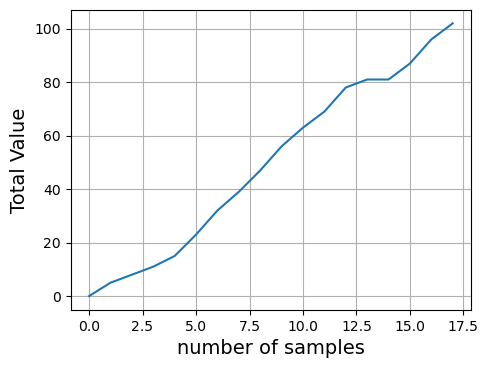

In [18]:
fig = plt.figure(figsize = (4,3)) # I selected the figure dimension here 
ax = fig.add_axes([0,0,1,1])
ax.plot(totallist)  # i use the quick an dirty way to make a plot here
ax.set_xlabel('number of samples',fontsize = 14)
ax.set_ylabel('Total Value',fontsize = 14)
plt.grid(True)
plt.show()


In [ ]:
nsample_list = np.arange(1,nsamples+1,1) # i made a numpy array from 1 to nsamples in steps of 1
fig = plt.figure(figsize = (4,3)) # I selected the figure dimension here 
ax = fig.add_axes([0,0,1,1])
ax.plot(nsample_list,totallist)  # i use the quick an dirty way to make a plot here
ax.set_xlabel('number of samples',fontsize = 14)
ax.set_ylabel('Total Value',fontsize = 14)
plt.grid(True)
plt.show()



### Example 3.  When will I have a thousand dollars? 

### Suppose you have 100 dollars.  You put in the bank, and each year they give you 2.5% interest (compounded annually).  How many years will it take for you to have more than 1000 dollars. 


In [20]:
### What is the answer to the question? In terms of the code?
interest = 0.025 # interest rate 
balance = 100 # starting balance
nyears = 0 
while balance <= 1000: #greater than 1000!  
    balance = balance+interest*balance
    nyears = nyears+1
    #write the code! 
print('Balance of ', balance, 'after ', nyears, 'years')
    

Balance of  1018.6930584867284 after  94 years
